# IMAGE ANALYSIS (separate image)

Libary: OpenCV <br>
Aim: identify roots from a binary image and collect found root information into csv-file.

QUESTION: THE SMALLEST RADIUS VALUE? SHOULD WE ABANDOM REALY SMALL TIPS? NOW THE THRESHOLD IS 10 (IF TIP RADIUS IS LESS THAN 10mm, TIP IS REJECTED) <BR>
Or should the user have a choice to adjust this threshold? <br>
(function find_contours(), if int(radius) <= 10)

In [160]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ipywidgets import *
from IPython.display import clear_output, display
import math

In [161]:
# import DETECT_ROOT funcitons 

from root_functions import scale_crop_gray, edge_areas_mask, change_areas_mask, light_areas_mask_color, remove_isolated_pixels
from root_functions import add_text, grab_contours, sort_contours

In [162]:
from ipywidgets import *
from tkinter import Tk, filedialog
%gui tk

In [163]:
# select image

def open_file():
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)

    infiles = filedialog.askopenfilename(multiple=True)
    return infiles


In [164]:
# read two files, one for binary image and second (color image) where to draw tip's circles

filename1 = open_file()
filename2 = open_file()

In [165]:
filename1
filename2

('C:/Users/OKa/Documents/_OKa/III. JAKSO/4. DS project/ML images/1.jpeg',)

('C:/Users/OKa/Documents/_OKa/III. JAKSO/4. DS project/ML images/1O.jpg',)

In [166]:
image2 = cv2.imread(filename2[0])

# Read image as unchanged 1-channel gray image
im1_gray = cv2.imread(filename1[0], cv2.IMREAD_GRAYSCALE)

# Convert the imager to binary
ret, im1_binary = cv2.threshold(im1_gray, 10, 255, cv2.THRESH_BINARY)

# Print count of image pixel values
unique, counts = np.unique(im1_binary, return_counts=True)
dict(zip(unique, counts))

# Show image
# plt.figure(figsize=(20, 20))
# plt.imshow(np.abs(im1_binary), cmap = 'gray')
# plt.show()

{0: 71286, 255: 1034}

<Figure size 3600x3600 with 0 Axes>

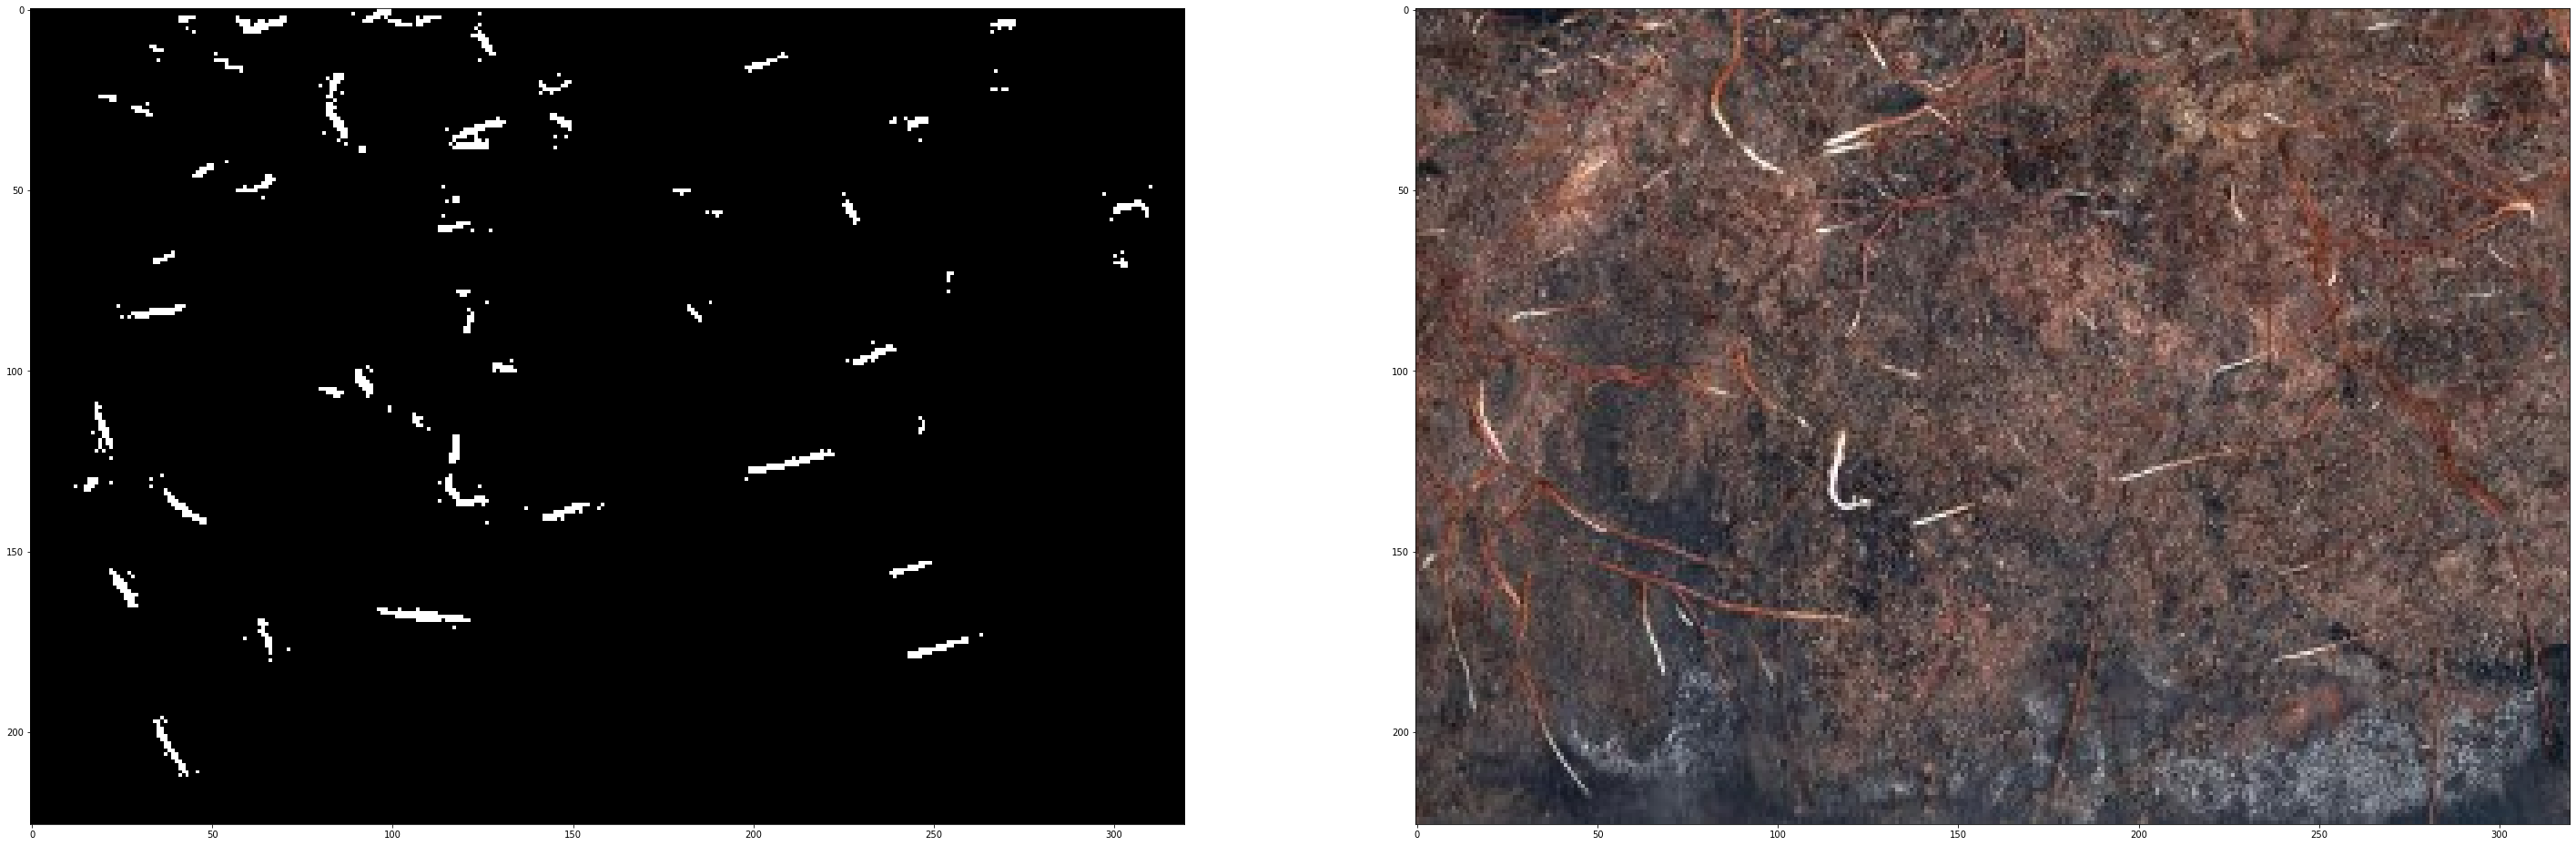

In [167]:
# Display images
im2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

images = [im1_binary, im2]

plt.figure(figsize=(50,50))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap = 'gray')

### Find contours of root tips

Find countours and collect contour coordinates to a dictionary

In [168]:
# find contours

def find_contours(filename, image, mask):
    # find the contours in the mask, then sort them from left to right
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    
    # Sort contours from left to right
    cnts = sort_contours(cnts)[0]
    print(f'Tips(TOTAL): {len(cnts)}')

    # loop over the contours and collect coordinates to the dictionary
    coordinates = {}
    imageID = 0
    for c in cnts:
    # get the bright spot of the image
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        if int(radius) <= 10:
            pass
        else:
            imageID += 1
            # coordinates[i] = [filename.split("_")[3], filename, (int(cX), int(cY)), int(radius), 'Y']
            coordinates[imageID] = [filename[0].split('/')[-1], (int(cX), int(cY)), int(radius), int(radius)*2]
    print(f'Tips(RADIUS BIGGER THAN 10mm): {len(coordinates)}')
    return coordinates

In [169]:
# create dictionary with image root data

im1_COORDINATES = find_contours(filename1, im1_binary, im1_gray)

Tips(TOTAL): 176
Tips(RADIUS BIGGER THAN 10mm): 18


In [170]:
# draw circle around roots and mark center of the circle

def draw_circles_around(image, coordinates, color):
    for i, v in coordinates.items():
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), v[2], color, 1)
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), 0, color, 1)

In [171]:
im1_COORDINATES

{1: ['1.jpeg', (17, 119), 16, 32],
 2: ['1.jpeg', (27, 26), 11, 22],
 3: ['1.jpeg', (35, 84), 11, 22],
 4: ['1.jpeg', (39, 202), 12, 24],
 5: ['1.jpeg', (43, 136), 12, 24],
 6: ['1.jpeg', (91, 107), 11, 22],
 7: ['1.jpeg', (87, 27), 13, 26],
 8: ['1.jpeg', (110, 6), 23, 46],
 9: ['1.jpeg', (111, 166), 16, 32],
 10: ['1.jpeg', (120, 127), 16, 32],
 11: ['1.jpeg', (123, 35), 11, 22],
 12: ['1.jpeg', (147, 140), 11, 22],
 13: ['1.jpeg', (144, 27), 13, 26],
 14: ['1.jpeg', (207, 127), 17, 34],
 15: ['1.jpeg', (206, 14), 11, 22],
 16: ['1.jpeg', (243, 28), 11, 22],
 17: ['1.jpeg', (252, 176), 13, 26],
 18: ['1.jpeg', (302, 59), 12, 24]}

In [172]:
# draw circles around roots of selected image

draw_circles_around(image2, im1_COORDINATES, (255, 255, 255))


In [173]:
# add text --> root ID

def add_Text(image, coordinates):
    i = 0
    for k, v in coordinates.items():
        i += 1
        cv2.putText(image, "#{}".format(i), (int(v[1][0]+5), int(v[1][1]) - 5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 255, 255), thickness=1)

In [174]:
add_Text(image2, im1_COORDINATES)

<Figure size 7200x7200 with 0 Axes>

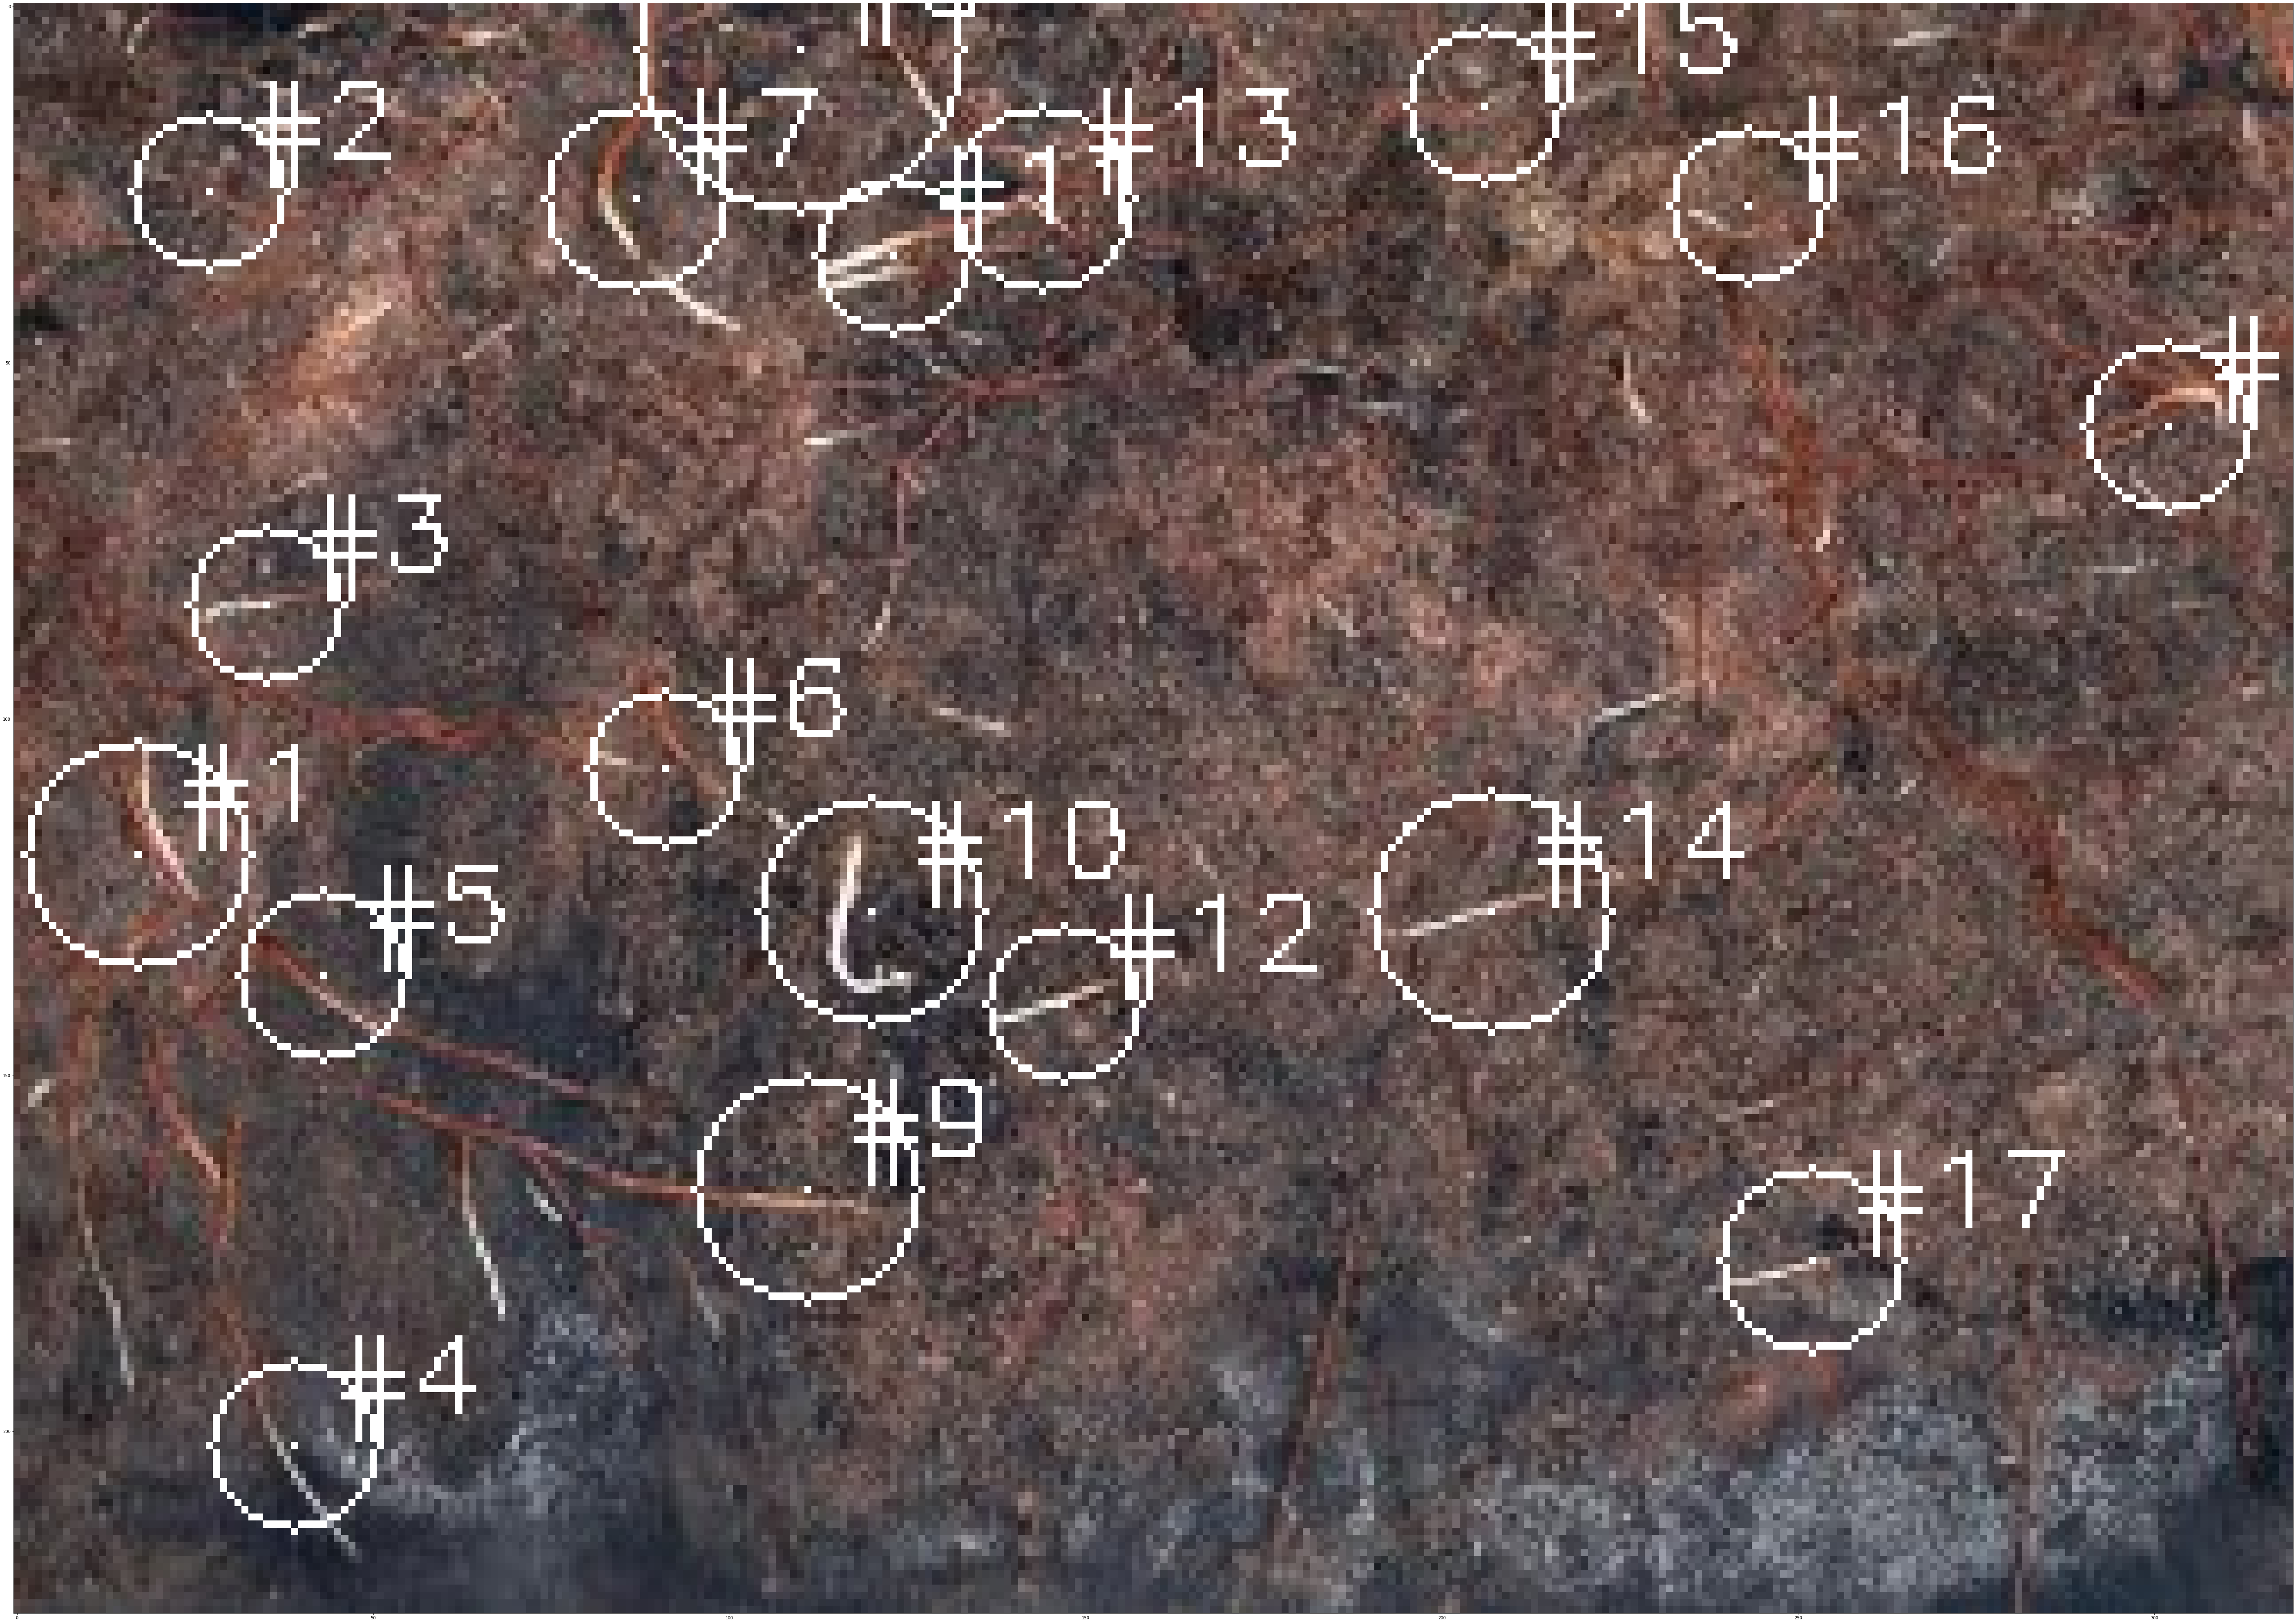

In [175]:
# Display image

plt.figure(figsize=(100,100))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)) # , cmap = 'gray')

In [176]:
# cv2.imwrite("Second.jpg", image2)

In [177]:
# create dataframe with root information from dictionary

image1 = pd.DataFrame.from_dict(im1_COORDINATES, orient='index', columns=['Image','(X,Y) coordinates', 'Radius','Diameter'])

In [178]:
image1 

,Image,"(X,Y) coordinates",Radius,Diameter
1,1.jpeg,"(17, 119)",16,32
2,1.jpeg,"(27, 26)",11,22
3,1.jpeg,"(35, 84)",11,22
4,1.jpeg,"(39, 202)",12,24
5,1.jpeg,"(43, 136)",12,24
6,1.jpeg,"(91, 107)",11,22
7,1.jpeg,"(87, 27)",13,26
8,1.jpeg,"(110, 6)",23,46
9,1.jpeg,"(111, 166)",16,32
10,1.jpeg,"(120, 127)",16,32


In [179]:
# save data to csv-file

image1.to_csv('outputIMAGE_SEPARATE.csv', sep=';', index_label='ImageID')

In [180]:
# save color image with found root tips

cv2.imwrite('tipIMAGE.png', image2)

True